#**Visualization of COVID-19 Epidemic in The Netherlands**

##**Identity**

Ihsan Aulia Rahman

Full Time Data Science

HCK-Batch-001

##**Description**

###Problem Statement

The COVID-19 pandemic has been disturbing the world in the past two years. With now six million people gone, hundreds of millions more suffered and billions of us on this planet affected indirectly. It is paramount to learn from what happened as to prepare us better for any disaster. 

One of the most important insight to learn in analyzing a pandemic is the infection and death rate. Cross referenced with field data this could give answer to what cause an outbreak and what measures needed to prevent it.

The Google Cloud platform is offering some of these information as public data. However, these data are not in easily read or comprehensible manner. For example, the data only present cumulative numbers on a given day and not the number happened that day, among other imperfections and miscategorizations.

Thus it is the job of a data analyst to process the data and present it in comprehensive way by cleaning up, rearranging and visualizing the data.

In this assignment I chose to examine the COVID-19 data in the Netherlands as it had one of the highest number of infection per capita in the world.

###Objective

The goals of this assignment are:

1. Load the data from Google Cloud BigQuery
2. Clean up the data 

    * Remove unnecessary information
    * Label the data with relevant information
    * Optimizing memory occupation
    * Manage missing and incompatible data

3. Process the data to produce meaningful information

    * Rearrange the data by category
    * Group and aggregate the data 

4. Present the information in digestible form, preferably with graphs
5. Draw conclusions and assumptions on the assignment


#**A. Libraries**

Here we import the necessary function libraries for the job.

In [1]:
import numpy as np
import pandas as pd

#**B. Loading**

###B.1. Query from Google Cloud

The data we are going to use is the COVID-19 summary from Google Cloud BigQuery titled `bigquery-public-data.covid19_jhu_csse_eu.summary`

The data is publicly available but is too large and general for our use. We decide to limit our work in the country of Netherlands. To extract the relevant data, we need to input a query in the Cloud console in SQL language.

In [114]:
from google.colab import auth
auth.authenticate_user
print('Authenticated')

from google.cloud import bigquery

project_id = 'week3-360509'
client = bigquery.Client(project = project_id)

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
"""
select *
from `bigquery-public-data.covid19_jhu_csse_eu.summary`
where country_region like "Netherlands";
"""

'\nselect *\nfrom `bigquery-public-data.covid19_jhu_csse_eu.summary`\nwhere country_region like "Netherlands";\n'

The lines in the code are commented out because they are in SQL language which cannot be run on this Python notebook.

After querying the relevant data, it is then saved as .csv file.

###B.2. Read .csv file as dataframe variable

To read the .cdv file in Python notebook, we use the Pandas function to read it and assign into a variable called `df` for convenience.

In [50]:
df = pd.read_csv('https://raw.githubusercontent.com/IARahman/COVID-19-Netherlands/main/BQ-Results-20220812.csv')
pd.set_option("display.precision", 0)

#**C. Initial Exploration**

##**C.1. Initial Exploration 1**

After loading the data we need to check it's superficials to decide next course of actions.

###C.1.1. Checking the shape of dataframe

In [ ]:
df.shape

(13462, 7)

The data has 13462 rows and 7 columns.

###C.1.2. Checking the column names, data types and null counts

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13462 entries, 0 to 13461
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province_state  13327 non-null  object 
 1   country_region  13462 non-null  object 
 2   date            13462 non-null  object 
 3   confirmed       13462 non-null  int64  
 4   deaths          13462 non-null  int64  
 5   recovered       7138 non-null   float64
 6   active          7102 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 736.3+ KB


###C.1.3. Checking the statistics of numerical columns

In [ ]:
df.describe()

,confirmed,deaths,recovered,active
count,1.346200e+04,13462.000000,7138.000000,7102.000000
mean,1.709168e+05,984.602362,719.986691,48190.300056
std,3.106235e+05,1292.259384,2269.402748,80418.904385
min,0.000000e+00,0.000000,0.000000,-10.000000
25%,6.526250e+03,72.000000,0.000000,403.500000
50%,3.946500e+04,344.000000,0.000000,10196.000000
75%,1.858685e+05,1500.000000,9.500000,50513.250000
max,1.754862e+06,6137.000000,13157.000000,440546.000000


###C.1.4. Checking 5 random rows from the dataset

In [ ]:
df.sample(5)

,province_state,country_region,date,confirmed,deaths,recovered,active
9804,Unknown,Netherlands,2021-05-22,3888,14,0.0,3874.0
13252,Overijssel,Netherlands,2021-06-12,109499,1135,0.0,108364.0
8351,Sint Maarten,Netherlands,2021-11-12,4526,75,NaN,NaN
12966,"Bonaire, Sint Eustatius and Saba",Netherlands,2021-06-27,1640,17,1612.0,11.0
5803,Utrecht,Netherlands,2020-10-19,20533,468,0.0,20065.0


###C.1.5. Anomalies found:



From our superficial examination we have found that:

1.   There is(are) value(s) `0` on column `'confirmed'`.
2.   There is(are) value(s) negative on column `'active'`.
3.   There are null values on columns `'province_state'`, `'recovered'` and `'active'`.
4.   The values in column `'date'` are not in line with index.
5.   The values in column `'confirmed'` is the sum of values from columns `'deaths',` `'recovered'` and `'active'`.
6.   Data type on column `'date`' is object which can be optimized.
7.   Data types on columns `'recovered'` and `'active'` are float64 despite numbers of people can only be whole.

##**C.2. Initial Exploration 2**

We still need more insight on the data before we can process it.

###C.2.1 Checking for unusual values in column `'province_states'`

In [ ]:
df['province_state'].nunique()

18

There are 18 unique values in column `'province_state'` but this does not necessarily means the Netherlands has 18 provinces (the country have 12 provinces, 3 overseas territories and 3 other countries under the kingdom's banner).

In [ ]:
df['province_state'].unique()

array(['Aruba', 'Bonaire, Sint Eustatius and Saba', 'Curacao', 'Drenthe',
       'Flevoland', 'Friesland', 'Gelderland', 'Groningen', 'Limburg',
       'Noord-Brabant', 'Noord-Holland', 'Overijssel', 'Sint Maarten',
       'Unknown', 'Utrecht', 'Zeeland', 'Zuid-Holland', nan,
       'Netherlands'], dtype=object)

As expected, the Dutch Carribeans are also included in this data.

In [ ]:
df['province_state'].value_counts()

Curacao                             879
Aruba                               877
Sint Maarten                        875
Bonaire, Sint Eustatius and Saba    862
Noord-Holland                       756
Zuid-Holland                        756
Zeeland                             756
Utrecht                             756
Unknown                             756
Overijssel                          756
Noord-Brabant                       756
Limburg                             756
Groningen                           756
Gelderland                          756
Friesland                           756
Flevoland                           756
Drenthe                             756
Netherlands                           6
Name: province_state, dtype: int64

###C.2.2. Checking rows with unusual values in column `'province_state'`

Examining the 6 rows of data with value `'Netherlands'` in column `'province_state'`.

In [ ]:
df[df['province_state']=='Netherlands']

,province_state,country_region,date,confirmed,deaths,recovered,active
124,Netherlands,Netherlands,2020-03-18,2051,58,2.0,NaN
3349,Netherlands,Netherlands,2020-03-20,2994,106,2.0,NaN
4882,Netherlands,Netherlands,2020-03-17,1705,43,2.0,NaN
5964,Netherlands,Netherlands,2020-03-16,1413,24,2.0,NaN
10034,Netherlands,Netherlands,2020-03-21,3631,136,2.0,NaN
10338,Netherlands,Netherlands,2020-03-19,2460,76,2.0,NaN


Examining non-zero data with value `'Unknown'` in column `'province_state'`.

In [ ]:
df[(df['province_state']=='Unknown') & (df['confirmed']!=0)].sort_values('date')

,province_state,country_region,date,confirmed,deaths,recovered,active
1811,Unknown,Netherlands,2020-07-17,488,18,0.0,470.0
7458,Unknown,Netherlands,2020-07-18,490,18,0.0,472.0
11254,Unknown,Netherlands,2020-07-19,489,18,0.0,471.0
9319,Unknown,Netherlands,2020-07-20,674,18,0.0,656.0
10354,Unknown,Netherlands,2020-07-21,494,18,0.0,476.0
...,...,...,...,...,...,...,...
3916,Unknown,Netherlands,2022-06-03,84139,21,NaN,NaN
12228,Unknown,Netherlands,2022-06-04,84139,21,NaN,NaN
3216,Unknown,Netherlands,2022-06-05,84139,21,NaN,NaN
5819,Unknown,Netherlands,2022-06-06,84139,21,NaN,NaN


Examining data with value `'pd.nan'` (null) in column `'province_state'`.

In [ ]:
df[df['province_state'].isnull()].sort_values('date')

,province_state,country_region,date,confirmed,deaths,recovered,active
4135,NaN,Netherlands,2020-02-27,1,0,0.0,NaN
3004,NaN,Netherlands,2020-02-28,1,0,0.0,NaN
5054,NaN,Netherlands,2020-02-29,6,0,0.0,NaN
12254,NaN,Netherlands,2020-03-01,10,0,0.0,NaN
11319,NaN,Netherlands,2020-03-02,18,0,0.0,NaN
...,...,...,...,...,...,...,...
6123,NaN,Netherlands,2020-07-12,51022,6137,0.0,44885.0
318,NaN,Netherlands,2020-07-13,51093,6137,0.0,44956.0
13127,NaN,Netherlands,2020-07-14,51146,6135,0.0,45011.0
7410,NaN,Netherlands,2020-07-15,51252,6136,0.0,45116.0


###C.2.3. Checking if other columns have unusual properties.

We further examine if there are funny bussinesses in other columns.

In [ ]:
df['country_region'].nunique()

1

In [ ]:
df['country_region'].unique()

array(['Netherlands'], dtype=object)

There is only one value in column `'country_region'` and that is `'Netherlands'`.

In [ ]:
df['date'].agg(("min", "max"))

min    2020-02-27
max    2022-08-11
Name: date, dtype: object

The data ranges from 27th February 2020 to 11th August 2022, the day patient zero is confirmed and the previous day this data was extracted from the cloud, respectively.

We also check our findings in previous initial exploration.

In [ ]:
df[df['active']==-10].sort_values('date')

,province_state,country_region,date,confirmed,deaths,recovered,active
10631,Unknown,Netherlands,2020-09-28,0,10,0.0,-10.0


In [ ]:
df[df['confirmed']==0].sort_values('date')

,province_state,country_region,date,confirmed,deaths,recovered,active
11137,Unknown,Netherlands,2020-09-27,0,10,0.0,0.0
10631,Unknown,Netherlands,2020-09-28,0,10,0.0,-10.0
1619,Unknown,Netherlands,2022-02-27,0,0,NaN,NaN
293,Unknown,Netherlands,2022-06-08,0,0,NaN,NaN
9358,Unknown,Netherlands,2022-06-09,0,0,NaN,NaN
...,...,...,...,...,...,...,...
12363,Unknown,Netherlands,2022-08-07,0,0,NaN,NaN
2949,Unknown,Netherlands,2022-08-08,0,0,NaN,NaN
5277,Unknown,Netherlands,2022-08-09,0,0,NaN,NaN
11435,Unknown,Netherlands,2022-08-10,0,0,NaN,NaN


###C.2.4. Findings:

1. The column `'country_region'` only contains value `'Netherlands'` and can be dropped.
2. Other than standard missing values in column `'province_state'`, there are also non-standard missing values and more general value `'Netherlands'` which refers to combined national level report. 
3. Upon further examination, the standard missing values from column `'province_state'` also refers to combined national level report while the non-standard ones - `Unknown` - cannot be deduced.
3. We are going to drop national level reports and create new ones from combined regional level reports.
4. All rows with value `0` in column `'confirmed'` (including the row with value `-10` in column `'active'`) also have value `'Unknown'` in their column `'province_state'`. These rows are deemed invalid and to be dropped.
5. The number of rows with missing values on column `'recovered'` and '`active'` are simply too great (more than half of the entire dataframe). These columns are deemed too incomplete to be processed and to be dropped. 

#**D. Cleaning**

After the preliminary examination, we can start cleaning up the data.

###D.1. Creating New Variable For The Cleaned Up Dataframe

Because we are going to make changes into the data, it is best to create a copy we are going to tamper with instead of doing so on the original query data.

In [135]:
NL_COVID_Clean=df.copy()
NL_COVID_Clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13462 entries, 0 to 13461
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province_state  13327 non-null  object 
 1   country_region  13462 non-null  object 
 2   date            13462 non-null  object 
 3   confirmed       13462 non-null  int64  
 4   deaths          13462 non-null  int64  
 5   recovered       7138 non-null   float64
 6   active          7102 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 736.3+ KB


###D.2. Renaming Columns

Here, we rename the columns into more accurate names.

In [136]:
new_names={
    'province_state':'Province',
    'date':'Date',
    'confirmed':'Cumulative_Confirmed',
    'deaths':'Cumulative_Death'
    }
NL_COVID_Clean.rename(new_names,axis=1,inplace=True)
NL_COVID_Clean

,Province,country_region,Date,Cumulative_Confirmed,Cumulative_Death,recovered,active
0,Aruba,Netherlands,2022-07-31,42080,224,NaN,NaN
1,"Bonaire, Sint Eustatius and Saba",Netherlands,2022-07-31,10834,37,NaN,NaN
2,Curacao,Netherlands,2022-07-31,45063,282,NaN,NaN
3,Drenthe,Netherlands,2022-07-31,209526,458,NaN,NaN
4,Flevoland,Netherlands,2022-07-31,190101,336,NaN,NaN
...,...,...,...,...,...,...,...
13457,Sint Maarten,Netherlands,2020-08-07,176,16,86,74
13458,Unknown,Netherlands,2020-08-07,530,18,0,512
13459,Utrecht,Netherlands,2020-08-07,4582,432,0,4150
13460,Zeeland,Netherlands,2020-08-07,905,69,0,836


###D.3. Optimizing Data Types

For better data handling, we need to change data types into more efficient ones.

In [137]:
NL_COVID_Clean["Date"] = pd.to_datetime(NL_COVID_Clean["Date"])
NL_COVID_Clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13462 entries, 0 to 13461
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Province              13327 non-null  object        
 1   country_region        13462 non-null  object        
 2   Date                  13462 non-null  datetime64[ns]
 3   Cumulative_Confirmed  13462 non-null  int64         
 4   Cumulative_Death      13462 non-null  int64         
 5   recovered             7138 non-null   float64       
 6   active                7102 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 736.3+ KB


###D.4. Dropping Columns and Rows

Let's now drop the columns we mentioned earlier.

In [138]:
NL_COVID_Clean.drop(columns=['country_region', 'recovered', 'active'], inplace=True)
NL_COVID_Clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13462 entries, 0 to 13461
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Province              13327 non-null  object        
 1   Date                  13462 non-null  datetime64[ns]
 2   Cumulative_Confirmed  13462 non-null  int64         
 3   Cumulative_Death      13462 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 420.8+ KB


And also the rows.

In [139]:
NL_COVID_Clean.drop(NL_COVID_Clean[NL_COVID_Clean["Province"] == 'Unknown'].index, inplace = True)
NL_COVID_Clean.drop(NL_COVID_Clean[NL_COVID_Clean["Province"] == 'Netherlands'].index, inplace = True)
NL_COVID_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12700 entries, 0 to 13461
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Province              12565 non-null  object        
 1   Date                  12700 non-null  datetime64[ns]
 2   Cumulative_Confirmed  12700 non-null  int64         
 3   Cumulative_Death      12700 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 496.1+ KB


###D.5. Handling Missing Data

As for the data with value null, we simply drop them.

In [140]:
NL_COVID_Clean.dropna(inplace=True)
NL_COVID_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12565 entries, 0 to 13461
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Province              12565 non-null  object        
 1   Date                  12565 non-null  datetime64[ns]
 2   Cumulative_Confirmed  12565 non-null  int64         
 3   Cumulative_Death      12565 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 490.8+ KB


#**E. Further Exploration**

Now that we have a clean and complete data, we can do the real work on it.

##**E.1. Querying Data**

###E.1.1. Date of Patient Zero case in Overijssel



In [10]:
NL_COVID_Clean.query("Province == 'Overijssel' & \
                      Cumulative_Confirmed>=0").agg({'Date':'min'})

Date   2020-07-17
dtype: datetime64[ns]

###E.1.2. Date when cumulative deaths passes 1000 in Utrecht

In [11]:
NL_COVID_Clean.query("Province == 'Utrecht' & \
                      Cumulative_Death>=1000").agg({'Date':'min'})

Date   2021-01-27
dtype: datetime64[ns]

###E.1.3. Historical data of Noord-Holland in 1 month frequency

In [ ]:
date_1 = pd.date_range(start='2020-03-01', periods=36, freq="M") + pd.Timedelta('1 day')
NL_COVID_Clean.loc[(NL_COVID_Clean['Date'].isin(date_1)) & 
                   (NL_COVID_Clean['Province']=='Noord-Holland')].sort_values('Date')

,Province,Date,Cumulative_Confirmed,Cumulative_Death
7229,Noord-Holland,2020-08-01,8193,815
679,Noord-Holland,2020-09-01,12554,828
3952,Noord-Holland,2020-10-01,25534,866
10309,Noord-Holland,2020-11-01,68316,1027
1058,Noord-Holland,2020-12-01,95162,1298
4299,Noord-Holland,2021-01-01,137776,1652
9086,Noord-Holland,2021-02-01,165511,2011
4763,Noord-Holland,2021-03-01,187376,2258
12411,Noord-Holland,2021-04-01,221885,2417
12811,Noord-Holland,2021-05-01,252949,2512


###E.1.4. Latest data from every provinces

In [ ]:
NL_COVID_Clean.loc[NL_COVID_Clean["Date"] == '2022-08-11', ['Province','Cumulative_Confirmed','Cumulative_Death']]

,Province,Cumulative_Confirmed,Cumulative_Death
5728,Aruba,42478,226
5729,"Bonaire, Sint Eustatius and Saba",10999,37
5730,Curacao,45209,283
5731,Drenthe,210160,458
5732,Flevoland,190761,336
5733,Friesland,285533,619
5734,Gelderland,1021211,2857
5735,Groningen,257064,360
5736,Limburg,546230,2181
5737,Noord-Brabant,1271679,3725


###E.1.5. Total cases and deaths in the Kingdom of Netherlands

In [ ]:
NL_COVID_Clean.loc[NL_COVID_Clean["Date"] == '2022-08-11', ['Province','Cumulative_Confirmed','Cumulative_Death']].agg({'Cumulative_Confirmed': 'sum','Cumulative_Death': 'sum'})

Cumulative_Confirmed    8470047
Cumulative_Death          23171
dtype: int64

###E.1.6. Querying using .iloc

In [ ]:
NL_COVID_Clean.loc[700:1200:100,:]

,Province,Date,Cumulative_Confirmed,Cumulative_Death
700,Utrecht,2022-06-20,669402,1539
806,"Bonaire, Sint Eustatius and Saba",2021-07-30,1707,17
912,Friesland,2020-10-20,4288,75
1018,Flevoland,2021-04-06,29921,226
1124,Drenthe,2021-09-05,38600,353


In this dataframe the date is not in line with index and numerical columns display cumulative values. 

As such, querying using iloc does not yield particularly useful data.

##**E.2. Creating New Table Based on Data From Mainland Only**

The data is quite informative for us to do some queries, but we're missing the other informations those are daily cases and deaths. We can conjure the additional data from the data we have.

###E.2.1 Creating new columns 

To acquire daily data, we need to calculate the difference between cumulative data of a day and the previous. To do this, we need to categorize the data by provinces and sort them by date before computing the difference. 

In [89]:
provinces = NL_COVID_Clean['Province'].unique().tolist()
provinces.remove('Aruba')
provinces.remove('Bonaire, Sint Eustatius and Saba')
provinces.remove('Curacao')
provinces.remove('Sint Maarten')

NL_Mainland_COVID_Daily = pd.DataFrame()

for province in provinces:
    region = NL_COVID_Clean.loc[NL_COVID_Clean['Province']==province].sort_values('Date').reset_index(drop=True)
    
    daily_conf_0 = [0]
    daily_conf = []
    daily_dead_0 = [0]
    daily_dead = []
    for i in range(1,len(region)):
        daily_conf.append(region['Cumulative_Confirmed'][i] - region['Cumulative_Confirmed'][i-1])
        Daily_Confirmed = daily_conf_0 + daily_conf
        daily_dead.append(region['Cumulative_Death'][i] - region['Cumulative_Death'][i-1])
        Daily_Death = daily_dead_0 + daily_dead
    
    region['Daily_Confirmed'] = Daily_Confirmed
    region['Daily_Death'] = Daily_Death
    NL_Mainland_COVID_Daily = pd.concat([NL_Mainland_COVID_Daily, region], sort=True)
    NL_Mainland_COVID_Daily = pd.DataFrame(NL_Mainland_COVID_Daily, columns=[
        'Province',
        'Date',
        'Cumulative_Confirmed',
        'Cumulative_Death',
        'Daily_Confirmed',
        'Daily_Death'])

NL_Mainland_COVID_Daily.reset_index(drop=True, inplace=True)
NL_Mainland_COVID_Daily 


,Province,Date,Cumulative_Confirmed,Cumulative_Death,Daily_Confirmed,Daily_Death
0,Drenthe,2020-07-17,536,41,0,0
1,Drenthe,2020-07-18,539,41,3,0
2,Drenthe,2020-07-19,539,41,0,0
3,Drenthe,2020-07-20,539,41,0,0
4,Drenthe,2020-07-21,540,41,1,0
...,...,...,...,...,...,...
9067,Zuid-Holland,2022-08-07,1752542,5202,0,0
9068,Zuid-Holland,2022-08-08,1753564,5202,1022,0
9069,Zuid-Holland,2022-08-09,1754001,5202,437,0
9070,Zuid-Holland,2022-08-10,1754476,5204,475,2


##**E.3. Grouping**

With the new data, we can do more advanced query using grouping and aggregate.

###E.3.1. Maximum and average number of daily cases and deaths in every province

In [107]:
Daily = NL_Mainland_COVID_Daily.groupby("Province").agg({'Daily_Confirmed': ['max','mean'], 'Daily_Death': ['max']})
Daily

Daily_Confirmed       Daily_Death
                          max  mean         max
Province                                       
Drenthe                 10310   277          14
Flevoland               16745   251           5
Friesland               18705   377          16
Gelderland              60771  1342          39
Groningen                9284   340           9
Limburg                 16699   716          55
Noord-Brabant           66913  1669          28
Noord-Holland           50530  1811          27
Overijssel              27108   768          23
Utrecht                 20253   905          20
Zeeland                  5763   230          50
Zuid-Holland            60104  2306          49

This dataframe is sorted by province names. We can further query into the dataframe to obtain the information we need.

In [108]:
Daily.sort_values(('Daily_Confirmed', 'max'), ascending=False)

Daily_Confirmed       Daily_Death
                          max  mean         max
Province                                       
Noord-Brabant           66913  1669          28
Gelderland              60771  1342          39
Zuid-Holland            60104  2306          49
Noord-Holland           50530  1811          27
Overijssel              27108   768          23
Utrecht                 20253   905          20
Friesland               18705   377          16
Flevoland               16745   251           5
Limburg                 16699   716          55
Drenthe                 10310   277          14
Groningen                9284   340           9
Zeeland                  5763   230          50

It seems Noord-Brabant had the highest count of daily cases at almost 67 thousand.

In [109]:
Daily.sort_values(('Daily_Confirmed', 'mean'), ascending=False)

Daily_Confirmed       Daily_Death
                          max  mean         max
Province                                       
Zuid-Holland            60104  2306          49
Noord-Holland           50530  1811          27
Noord-Brabant           66913  1669          28
Gelderland              60771  1342          39
Utrecht                 20253   905          20
Overijssel              27108   768          23
Limburg                 16699   716          55
Friesland               18705   377          16
Groningen                9284   340           9
Drenthe                 10310   277          14
Flevoland               16745   251           5
Zeeland                  5763   230          50

While Zuid-Holland had the highest average daily cases at 23 hundred every day.

In [110]:
Daily.sort_values(('Daily_Death', 'max'), ascending=False)

Daily_Confirmed       Daily_Death
                          max  mean         max
Province                                       
Limburg                 16699   716          55
Zeeland                  5763   230          50
Zuid-Holland            60104  2306          49
Gelderland              60771  1342          39
Noord-Brabant           66913  1669          28
Noord-Holland           50530  1811          27
Overijssel              27108   768          23
Utrecht                 20253   905          20
Friesland               18705   377          16
Drenthe                 10310   277          14
Groningen                9284   340           9
Flevoland               16745   251           5

From here we can deduce the pandemic was the deadliest in Limburg

###E.3.2. Total cases and deaths between 1st January and 1st April 2022 by province.

In [113]:
date_2 = pd.date_range(start='2022-01-01', end='2022-04-01') + pd.Timedelta('1 day')
Total = NL_Mainland_COVID_Daily.loc[(NL_Mainland_COVID_Daily['Date'].isin(date_2))].groupby("Province").agg({'Daily_Confirmed': 'sum','Daily_Death': 'sum'})
renames={'Daily_Confirmed':'Total_Confirmed','Daily_Death':'Total_Death'}
Total.rename(renames,axis=1,inplace=True)
Total

,Total_Confirmed,Total_Death
Province,,
Drenthe,133152,27
Flevoland,106357,21
Friesland,173840,32
Gelderland,603817,185
Groningen,165069,13
Limburg,290115,86
Noord-Brabant,735458,125
Noord-Holland,769644,215
Overijssel,349947,59


#**F. Visualization**

##**F.1. Cumulative and Daily Cases and Death Over Time in Gelderland**

In [126]:
Gelderland = NL_Mainland_COVID_Daily[NL_Mainland_COVID_Daily.Province == 'Gelderland']

Cumulative Cases in Gelderland


<AxesSubplot:xlabel='Date'>

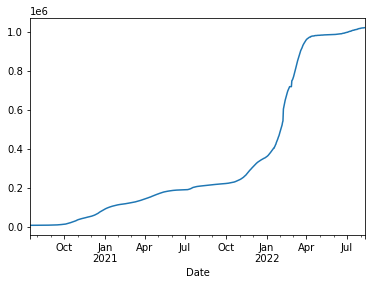

In [127]:
Gelderland.groupby('Date')['Cumulative_Confirmed'].sum().plot()

Daily Cases in Gelderland

<AxesSubplot:xlabel='Date'>

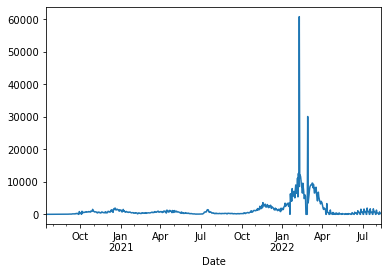

In [128]:
Gelderland.groupby('Date')['Daily_Confirmed'].sum().plot()

Cumulative Deaths in Gelderland

<AxesSubplot:xlabel='Date'>

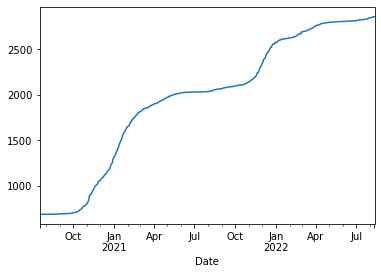

In [129]:
Gelderland.groupby('Date')['Cumulative_Death'].sum().plot()

 Daily Deaths in Gelderland

<AxesSubplot:xlabel='Date'>

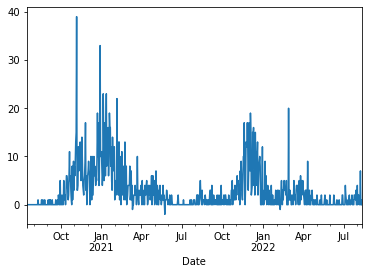

In [130]:
Gelderland.groupby('Date')['Daily_Death'].sum().plot()

##**F.2. Cumulative and Daily Cases and Death Over Time on National Level**

 Cumulative Cases in The Netherlands

<AxesSubplot:xlabel='Date'>

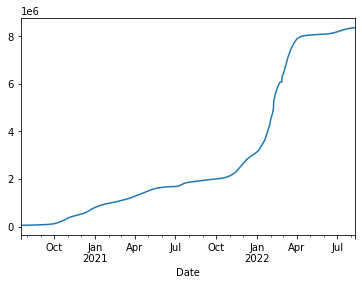

In [131]:
NL_Mainland_COVID_Daily.groupby('Date')['Cumulative_Confirmed'].sum().plot()

 Daily Cases in The Netherlands

<AxesSubplot:xlabel='Date'>

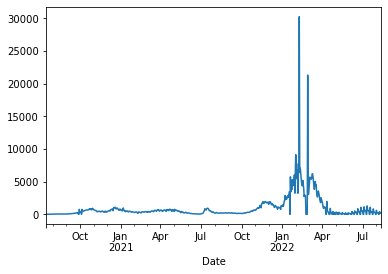

In [132]:
NL_Mainland_COVID_Daily.groupby('Date')['Daily_Confirmed'].mean().plot()

Cumulative Deaths in The Netherlands

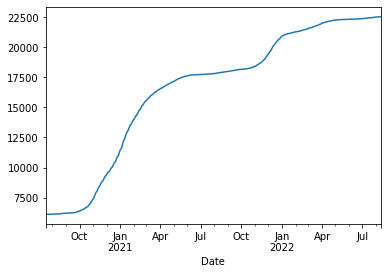

In [ ]:
NL_Mainland_COVID_Daily.groupby('Date')['Cumulative_Death'].sum().plot()

 Daily Deaths in The Netherlands

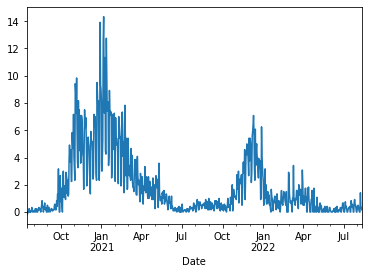

In [ ]:
NL_Mainland_COVID_Daily.groupby('Date')['Daily_Death'].mean().plot()

##**F.3. Cumulative Cases and Deaths in Every Provinces**

Cumulative Cases in The Netherlands on 11th August 2022 by Provinces (in logarithmic view)

<AxesSubplot:xlabel='Province'>

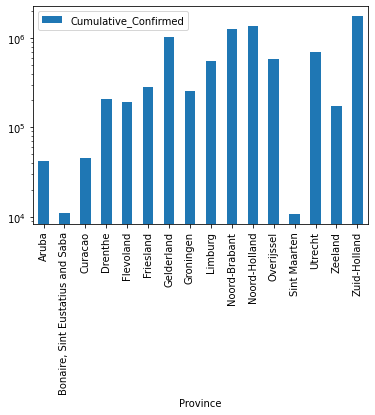

In [141]:
NL_COVID_Clean.loc[NL_COVID_Clean["Date"] == '2022-08-11',['Province','Cumulative_Confirmed']].set_index('Province').plot(kind='bar',logy=True)

Cumulative Deaths in The Netherlands on 11th August 2022 by Provinces (in logarithmic view)

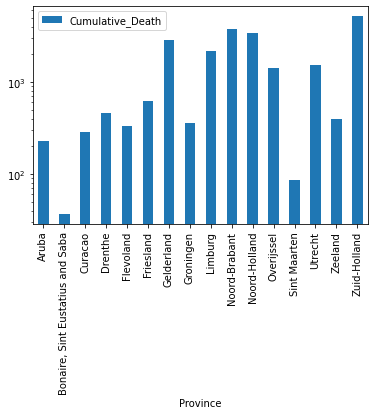

In [ ]:
NL_COVID_Clean.loc[NL_COVID_Clean["Date"] == '2022-08-11',['Province','Cumulative_Death']].set_index('Province').plot(kind='bar',logy=True)

#**Conclusions, Assumptions, Overall Analysis**

##**Conclusion**

* The country of Netherlands has been hit hard by the pandemic. With total cases of over 8 millions, compared to the country's headcount of just 17 millions, more than half of the population has been directly affected by the plague.

* The emergence of Omicron variant in late 2021 and the opening of the country in early 2022 gave rise to daily cases and most part of total cases.

##**Assumptions**

* The country got it's **patient zero case very early** in February 2020, most likely due to the existence of **Schiphol Airport that is considered as the aviation flight of Europe and received many flights from all over the world.**
* The very high part of the population infected could be attributed to the fact the **Netherlands has the highest population density in Europe so the disease could infect from person to person at much quicker rate.**
* However, the same density could also played factor in no province hit harder than the other. As seen from the graphs, the shape of cases and deaths accumulation in the provinces match very close to that of the national level. **Close proximity to each other likely made the prevention and mitigation effort easier and more equal across the nation.**

##**Analysis**

Final analysis from this assignment is that a developed and dense country like the Netherlands also have it's unique challenges and advantage in managing the COVID-19 pandemic.